## Imports

In [1]:

import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from EvaluationFunctions import performance_evaluation
import pipline

In [2]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
origin_dim = x_train.shape[1]

# Нормалізація
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# reshape to flat
x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

x_train_flat.shape

(60000, 784)

## evaluation on Decision Trees

In [ ]:
def get_model():
    return DecisionTreeClassifier()

### Performance evaluation - original data

Час навчання mlp - 20.1
Час затрачений для передбачення всіх x_test(10000) - 0.01 сек
Розмір моделі в оперативній пам'яті: 56 байт
Розмір файлу-моделі на диску: 1109.23 KB
classification report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.95      0.96      0.96      1135
           2       0.87      0.86      0.86      1032
           3       0.83      0.86      0.85      1010
           4       0.88      0.87      0.87       982
           5       0.83      0.84      0.84       892
           6       0.89      0.88      0.89       958
           7       0.92      0.90      0.91      1028
           8       0.83      0.81      0.82       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



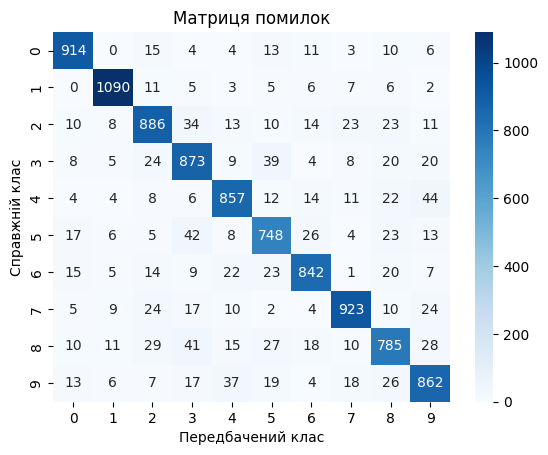

In [13]:
performance_evaluation(get_model(), x_train_flat, y_train, x_test_flat, y_test)

### Performance evaluation - reduced data - only AE

Час навчання mlp - 163.64
Час затрачений для передбачення всіх x_test(10000) - 0.01 сек
Розмір моделі в оперативній пам'яті: 56 байт
Розмір файлу-моделі на диску: 958.48 KB
classification report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       980
           1       0.95      0.95      0.95      1135
           2       0.89      0.84      0.86      1032
           3       0.85      0.85      0.85      1010
           4       0.87      0.86      0.86       982
           5       0.85      0.82      0.83       892
           6       0.90      0.91      0.91       958
           7       0.90      0.91      0.90      1028
           8       0.82      0.84      0.83       974
           9       0.84      0.84      0.84      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



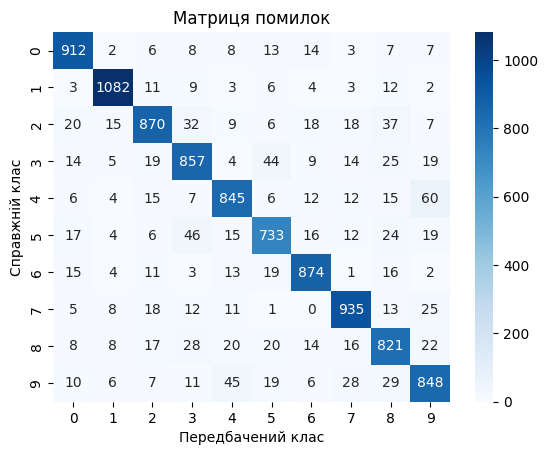

In [14]:
myPipe = pipline.myReducePipline()
x_train_ae,x_test_ae = myPipe.fit_ae_model(x_train_flat,x_test_flat)
performance_evaluation(get_model(), x_train_ae, y_train, x_test_ae, y_test)

### Performance evaluation - reduced data - only SVD

Час навчання mlp - 17.29539179801941
Час затрачений для передбачення всіх x_test(10000) - 0.01251983642578125 сек
Розмір моделі в оперативній пам'яті: 56 байт
Розмір файлу на диску: 125.41 KB
classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



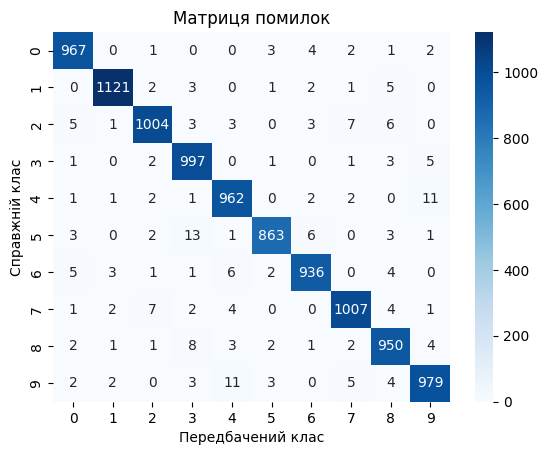

In [20]:
myPipeSvd = pipline.myReducePipline()
x_train_svd,x_test_svd = myPipeSvd.fit_svd_model(x_train_flat,x_test_flat)
performance_evaluation(get_model(), x_train_svd, y_train, x_test_svd, y_test)

### Performance evaluation - reduced data

Час навчання mlp - 33.54
Час затрачений для передбачення всіх x_test(10000) - 0.0 сек
Розмір моделі в оперативній пам'яті: 56 байт
Розмір файлу-моделі на диску: 1366.29 KB
classification report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       980
           1       0.96      0.96      0.96      1135
           2       0.85      0.83      0.84      1032
           3       0.79      0.81      0.80      1010
           4       0.78      0.81      0.80       982
           5       0.79      0.75      0.77       892
           6       0.89      0.89      0.89       958
           7       0.86      0.84      0.85      1028
           8       0.74      0.73      0.74       974
           9       0.78      0.79      0.78      1009

    accuracy                           0.84     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.84      0.84      0.84     10000



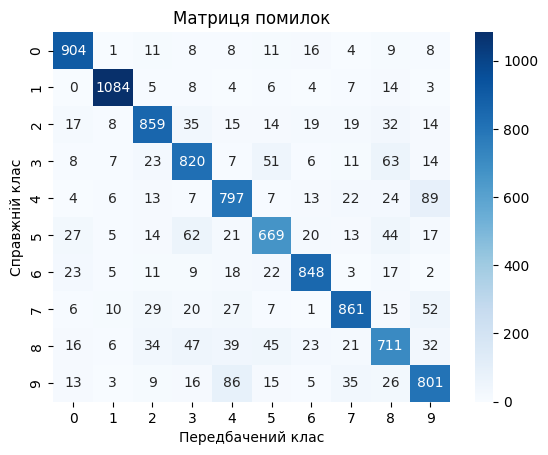

In [15]:
myPipe = pipline.myReducePipline()
x_train_reduced,x_test_reduced = myPipe.run_pipeline(x_train_flat,x_test_flat)
performance_evaluation(get_model(), x_train_reduced, y_train, x_test_reduced, y_test)

### print all data size

In [16]:
x1 = sys.getsizeof(x_train)
x2 = sys.getsizeof(x_train_ae)
x3 = sys.getsizeof(x_train_reduced)
print(f"Розмір оригінальних даних       - { x1 } байт")
print(f"Розмір після автоенкодера       - { x2 } байт ({x2/x1})")
print(f"Розмір після автоенкодера + SVD - { x3 } байт ({x3/x2})")

Розмір оригінальних даних       - 188160144 байт
Розмір після автоенкодера       - 188160128 байт (0.9999999149660515)
Розмір після автоенкодера + SVD - 34560128 байт (0.1836740247115478)


## visualisation

In [ ]:
x_ae = x_train_ae.reshape(len(x_train_ae), origin_dim, -1)
x_ae.shape

(60000, 28, 28)

In [ ]:
X_recovered = myPipeSvd.get_svd_inverse_transform(x_train_svd)
x_svd = X_recovered.reshape(len(X_recovered), origin_dim, -1)
x_svd.shape

(60000, 28, 28)

In [ ]:
import math
x_svd_lat = x_train_svd.reshape(len(x_train_svd), int(math.sqrt(myPipeSvd.lat_dim_svd)), -1)
x_svd_lat.shape

(60000, 8, 10)

In [ ]:
def plot_classes(x, y, title=''):
    unique_classes = np.unique(y)
    nrows, ncols = 1, 10
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 5), squeeze=False)

    # Для кожного унікального класу
    for i, digit_class in enumerate(unique_classes):
        row, col = i // ncols, i % ncols
        ax = axes[row][col]

        class_indices = np.where(y == digit_class)[0]
        digit_index = class_indices[0]
        digit_data = x[digit_index]

        ax.imshow(digit_data, cmap='gray')
        ax.set_title(f"Клас: {digit_class}")
        ax.axis('off')

    plt.tight_layout()
    print(title)
    plt.show()

origin


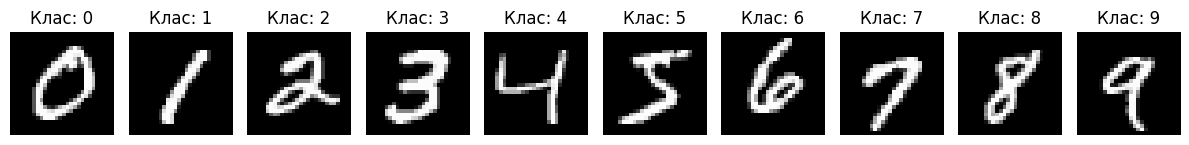

after AutoEncoder


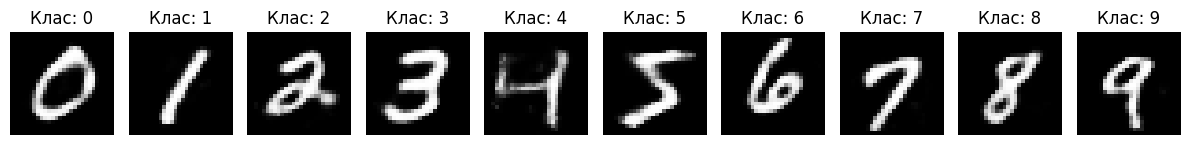

after AE+SVD (inversed)


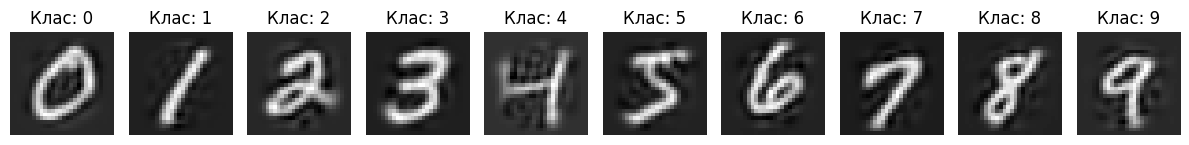

after AE+SVD (reduced)


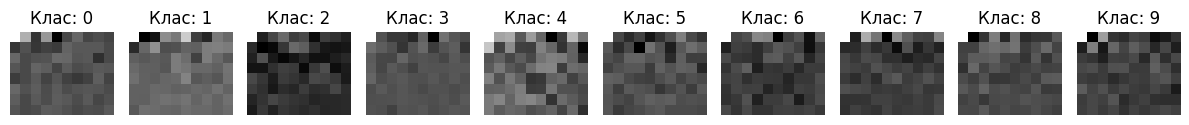

In [ ]:
plot_classes(x_train,y_train, "origin")
plot_classes(x_ae,y_train, "after AutoEncoder")
plot_classes(x_svd,y_train, "after AE+SVD (inversed)") # after svd inverse
plot_classes(x_svd_lat,y_train, "after AE+SVD (reduced)") # clean svd